In [115]:
# import pandas
import pandas as pd

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# import seaborn
import seaborn as sns

# import rcParams and set the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

# import KMeans from sklearn
from sklearn.cluster import KMeans

In [116]:
# read the data
df_customer = pd.read_csv("mall_customers.csv")

# print first five rows of data
df_customer.head()

,CustomerID,Genre,Age,Annual Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [117]:
df_customer.rename(columns={'Genre':'Gender'},inplace=True)

In [118]:
df_customer.head()

,CustomerID,Gender,Age,Annual Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [119]:
# check the shape of the data
df_customer.shape

(200, 5)

In [120]:
# check the data types of the variables
df_customer.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income              int64
Spending Score (1-100)     int64
dtype: object

In [121]:
# check for missing values
df_customer.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income             0
Spending Score (1-100)    0
dtype: int64

In [122]:
# drop unwanted column
df_customer.drop(['CustomerID'], axis=1, inplace=True)

In [123]:
# filter the numerical variables
df_num = df_customer.select_dtypes(include=np.number)

# print the first three rows of the data
df_num.head(3)

,Age,Annual Income,Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6


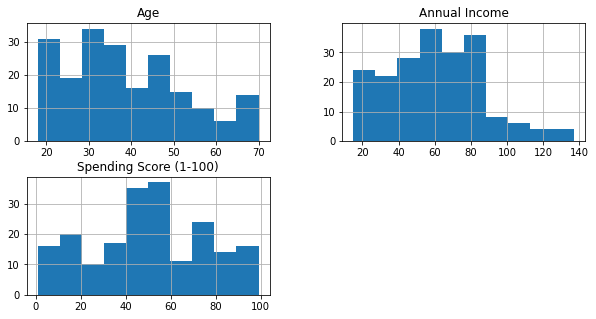

In [124]:
# create a histogram for numerical variables
df_num.hist()
# diaplay the plot
plt.show()

<AxesSubplot:>

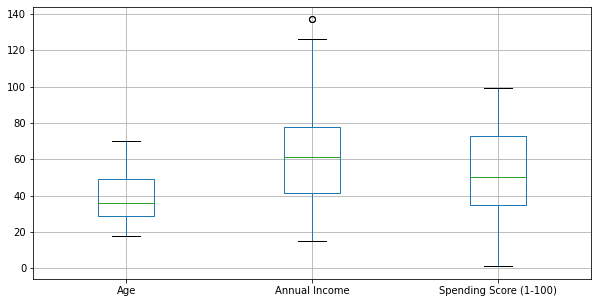

In [125]:
# create a boxplot for numeric variables
df_num.boxplot()

**Gender distribution**

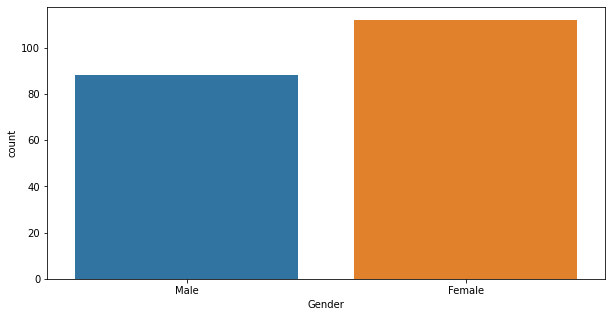

In [126]:
# create a countplot
sns.countplot(x='Gender', data=df_customer)
# display the plot
plt.show()

**Average anual income by gender**

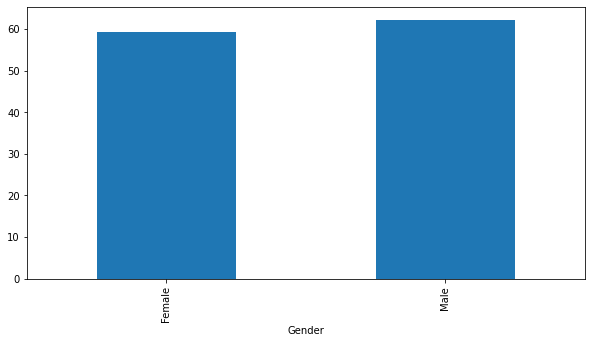

In [127]:
# create a barplot
df_customer.groupby('Gender')['Annual Income'].mean().plot(kind='bar')
# display the plot
plt.show()

**Average spending score by gender**

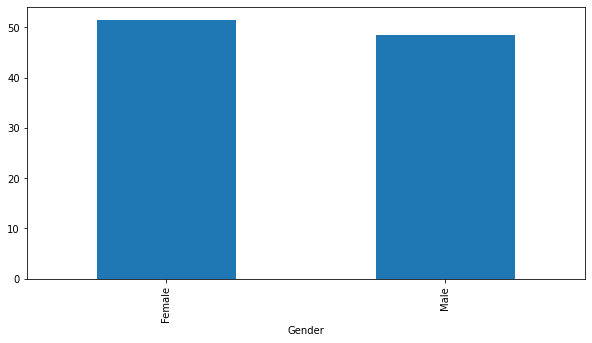

In [128]:
# create the barplot
df_customer.groupby('Gender')['Spending Score (1-100)'].mean().plot(kind='bar')
# display the plot
plt.show()

**Total spending score by gender**

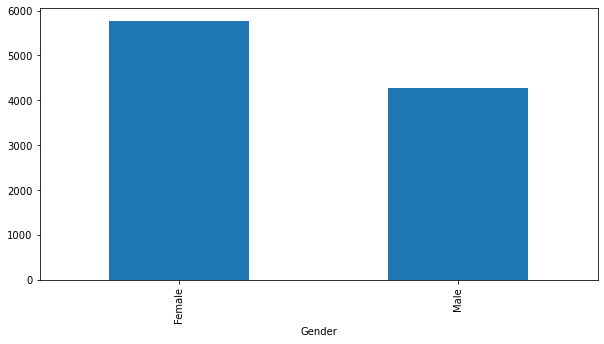

In [129]:
# create the barplot
df_customer.groupby('Gender')['Spending Score (1-100)'].sum().plot(kind='bar')
# display the plot
plt.show()

Text(0.5, 1.0, 'Histogram for Spending Score')

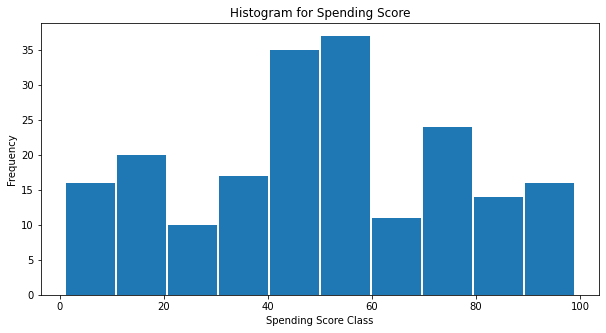

In [130]:
#my_bins=10
# Histogram used by deafult 10 bins
arr=plt.hist(df_customer['Spending Score (1-100)'],bins=10, rwidth=0.95) 
# set label for x-axis
plt.xlabel('Spending Score Class')
# set label for y-axis
plt.ylabel('Frequency')
# set title of the graph
plt.title('Histogram for Spending Score')

### Model Building

**Customer segmentation using Annual Income and Spending Score**

In [131]:
# consider the variables
X = df_customer[['Annual Income', 'Spending Score (1-100)']]

In [132]:
# create empty dictionary
sse = {}
for k in range(1, 11): # select the range for k 
    kmeans = KMeans(n_clusters=k, random_state=42) # build the model
    kmeans.fit(X) # fit the model
    sse[k] = kmeans.inertia_ 

C:\Users\darsh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


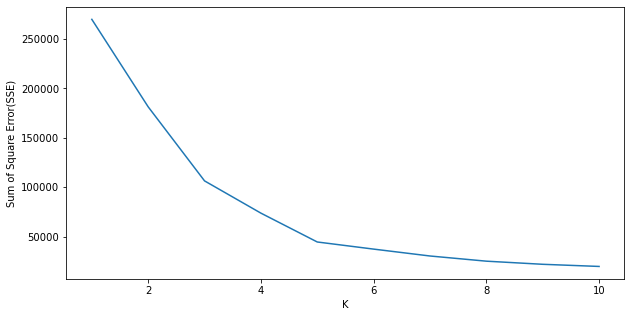

In [133]:
# set the label for x-axis
plt.xlabel('K')
# set the label for y-axis
plt.ylabel('Sum of Square Error(SSE)')
# plot the sse for different k values
plt.plot(list(sse.keys()), list(sse.values()))

In [134]:
# build model for k=5
model = KMeans(n_clusters=5, random_state=42)
# fit the model
model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [135]:
# predict the values
y_predicted = model.fit_predict(X)

In [136]:
# add the new column to the dataframe
df_customer['cluster'] = y_predicted
# display the dataframe
df_customer.head()

,Gender,Age,Annual Income,Spending Score (1-100),cluster
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


In [137]:
# check the number of clusters
df_customer['cluster'].unique()

array([2, 3, 0, 4, 1])

In [138]:
# get all the values
X = X.values

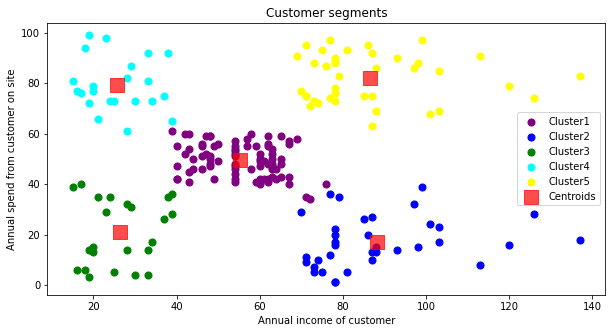

In [139]:
# Visualizing the clusters for k=5
plt.scatter(X[y_predicted==0,0],X[y_predicted==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_predicted==1,0],X[y_predicted==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_predicted==2,0],X[y_predicted==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_predicted==3,0],X[y_predicted==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(X[y_predicted==4,0],X[y_predicted==4,1],s=50, c='yellow',label='Cluster5')

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()



In [140]:
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

<AxesSubplot:xlabel='cluster', ylabel='count'>

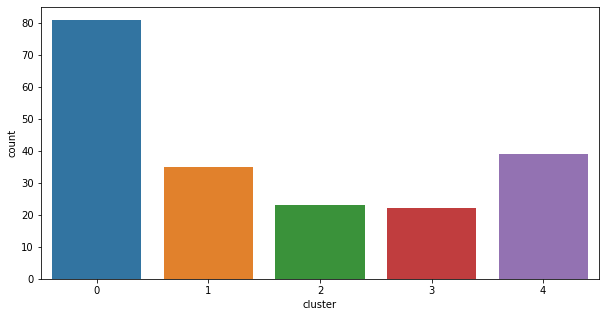

In [141]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= df_customer, x = 'cluster')
         

# add values in the graph
#plt.text(x = -0.15, y =6, s = np.unique(model.labels_, return_counts=True)[1][0])
#plt.text(x = 0.8, y =9, s = np.unique(model.labels_, return_counts=True)[1][1])
#plt.text(x = 1.9, y =5, s = np.unique(model.labels_, return_counts=True)[1][2])

#plt.show()

In [142]:
# check the data type of the 'cluster'
df_customer['cluster'].dtypes

dtype('int32')

In [143]:
# change the data type
df_customer = df_customer['cluster'].astype(object)

In [144]:
# serializing our model to a file called model.pkl
import pickle
pickle.dump(model, open("model.pkl","wb"))

# Hierarchical Clustering

In [145]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.preprocessing import StandardScaler

In [146]:
df=pd.read_csv("Mall_Customers.csv")

In [147]:
df.head()

,CustomerID,Genre,Age,Annual Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [148]:
df.shape

(200, 5)

In [149]:
df.describe()

,CustomerID,Age,Annual Income,Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [150]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income              int64
Spending Score (1-100)     int64
dtype: object

In [151]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income             0
Spending Score (1-100)    0
dtype: int64

In [152]:
df.drop(["CustomerID"],axis=1,inplace=True)

In [153]:
df.rename(columns={'Annual Income (k$)':'Annual Income'},inplace=True)


In [154]:
df.head()

,Genre,Age,Annual Income,Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [155]:
df.rename(columns={'Spending Score (1-100)':'Spending Score'},inplace=True)


In [156]:
df.head()

,Genre,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [157]:
df.drop(["Genre"],axis=1,inplace=True)

In [158]:
from sklearn.preprocessing import StandardScaler

In [159]:
scaler=StandardScaler()
segmentation_std=scaler.fit_transform(df)

In [160]:
hier_clust=linkage(segmentation_std,method='ward')

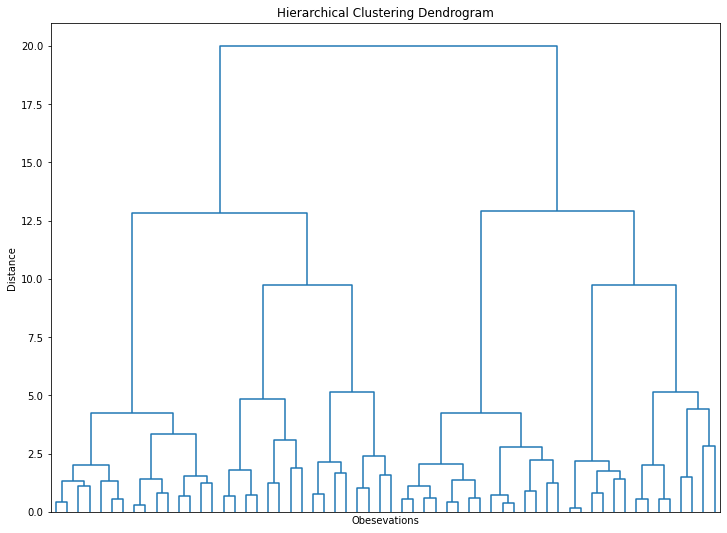

In [161]:
plt.figure(figsize=(12,9))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel('Obesevations')
plt.ylabel('Distance')
dendrogram(hier_clust,truncate_mode='level',p=5,show_leaf_counts=False, no_labels=True,color_threshold=0)
plt.show()

In [162]:
X = df.iloc[:, [1, 2]].values

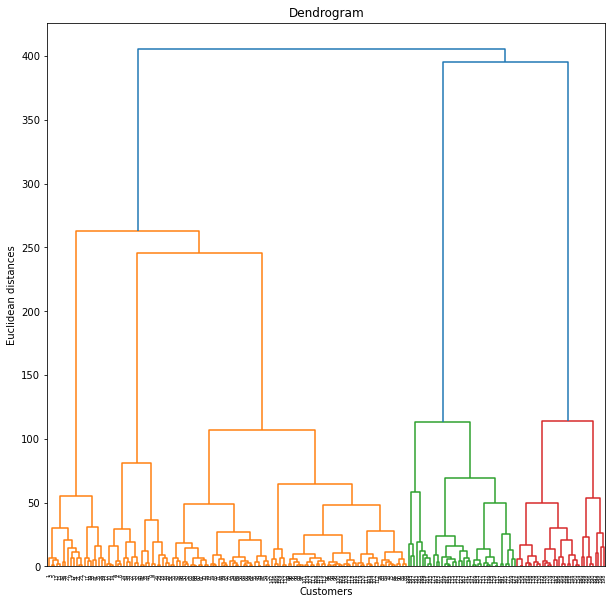

In [163]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

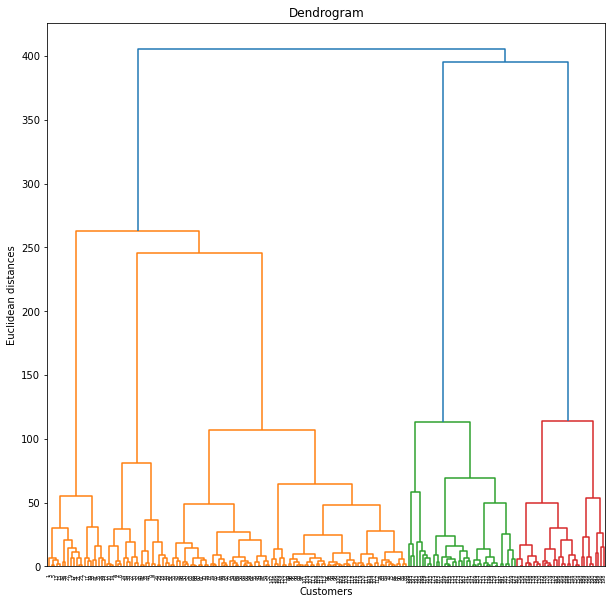

In [164]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# According to the result of Hierarchical Clustering we conclude that the number of resulting clusters are less than that of clusters resulting in K-Means Clustering .Smaller number of the clusters obviously might not be able to capture a small but important difference between the groups that could have been found by increasing the number.


# So we are going to deploy our model on the basis of K-Means Clustering